In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
import yfinance as yf
yf.pdr_override()

In [3]:
df = pdr.get_data_yahoo("TSLA")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-09-18,271.160004,271.440002,263.760010,265.279999,265.279999,101543300
2023-09-19,264.350006,267.850006,261.200012,266.500000,266.500000,103704000
2023-09-20,267.040009,273.929993,262.459991,262.589996,262.589996,122514600


<Axes: xlabel='Date'>

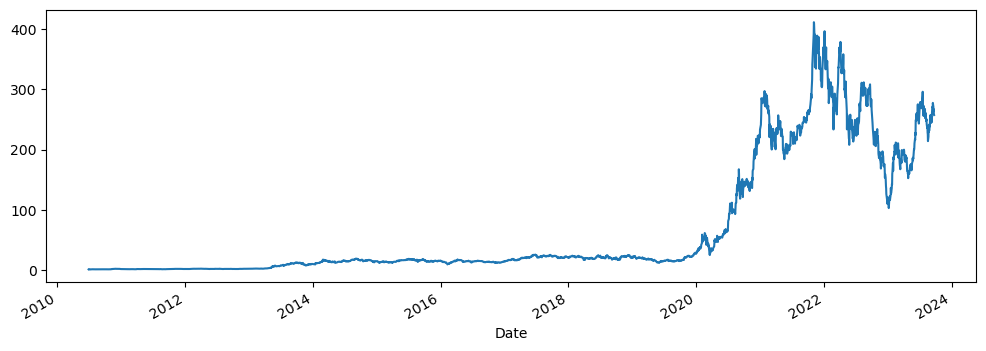

In [7]:
df["Open"].plot(figsize = (12,4))

In [8]:
# simple moving average

df["Open:10 days rolling"] = df["Open"].rolling(window=10,min_periods = 1).mean()

<Axes: xlabel='Date'>

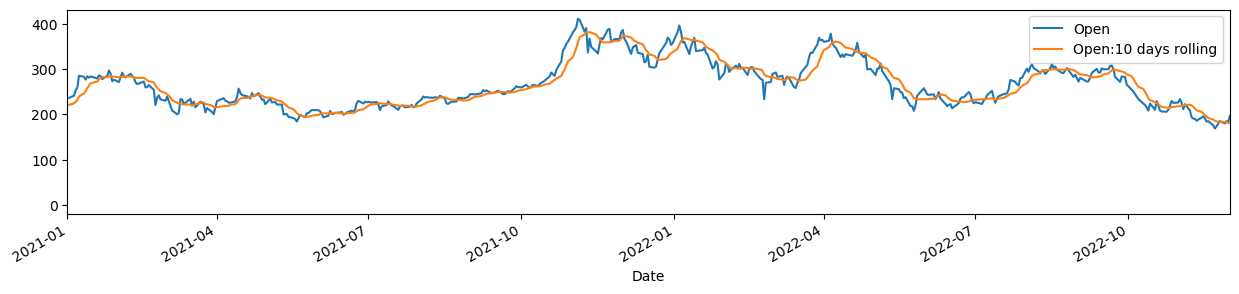

In [12]:
df[["Open","Open:10 days rolling"]].plot(xlim = ["2021-01-01","2022-12-01"],figsize = (15,3))

In [14]:
df["Open:30 days rolling"] = df["Open"].rolling(window=30,min_periods = 1).mean()
df["Open:50 days rolling"] = df["Open"].rolling(window=50,min_periods = 1).mean()
df["Open:70 days rolling"] = df["Open"].rolling(window=70,min_periods = 1).mean()

<Axes: xlabel='Date'>

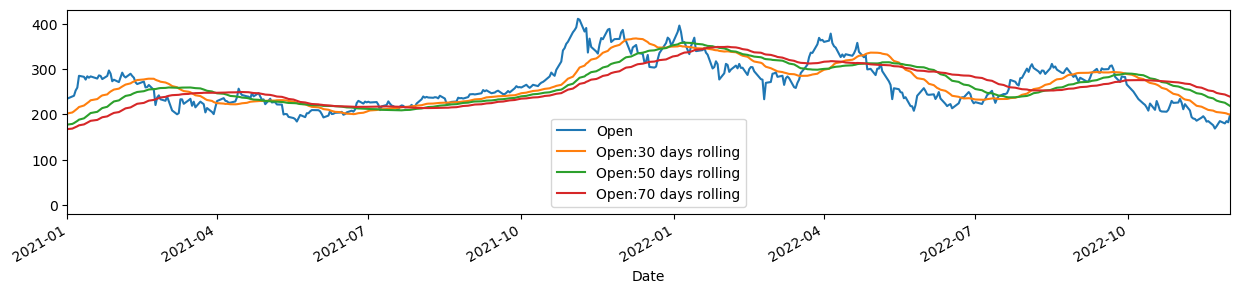

In [15]:
df[["Open","Open:30 days rolling","Open:50 days rolling","Open:70 days rolling"]].plot(xlim = ["2021-01-01","2022-12-01"],figsize = (15,3))

<Axes: xlabel='Date'>

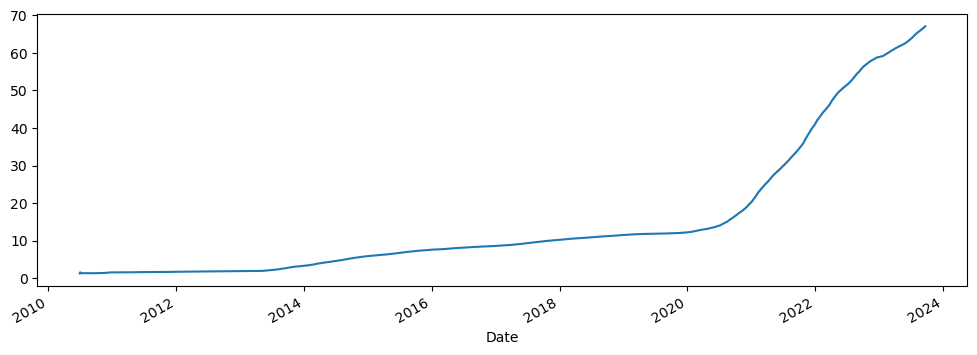

In [18]:
# Expanding
# cumalative moving average

df["Open"].expanding().mean().plot(figsize = (12,4))

In [19]:
# exponential weighted moving average :-EWMA

df["ema_0.1"] = df["Open"].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

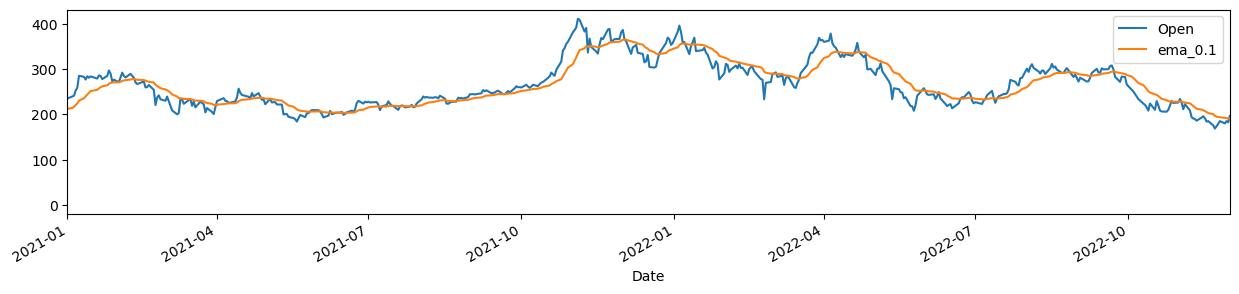

In [21]:
df[["Open","ema_0.1"]].plot(xlim = ["2021-01-01","2022-12-01"],figsize = (15,3))